# This is pyhton notebook where you can train your own model


In [3]:
import best_brain as bb
from data_manager import LoaderOHLCV

- num_epochs - how many times it will go thorugh all the data
- input_file_name - file with training data must be in "datasets" folder relative to this notebook
- bb.load_data_mode - keep it 2, otherwise model will not work well

In [4]:
# Train parameters
learning_rate = 0.001
num_epochs = 10 # Epoch: Passes the entire training dataset to the model once
input_file_name = 'Full_train_1_minute.csv' #
bb.load_data_mode = 2    

Here you can set name for yor model or, you can set it to "not_given" to let the program create you a technical name

In [5]:
# model_name has to end with pth
model_name = "actual_model.pth" # must be in "datasets" folder
bb.model_path = bb.create_model_path(model_name)

This loads the model to your device (to CPU if you do not have CUDA installed)

In [6]:
# Loads model to device
bb.model.to(bb.device)

LSTM(
  (lstm): LSTM(1, 8, batch_first=True)
  (fc): Linear(in_features=8, out_features=1, bias=True)
)

In [7]:
# Loads an prepares dataset
DataManager = LoaderOHLCV(bb.look_back,bb.load_data_mode, input_file=input_file_name)
X_train, X_test, y_train, y_test = DataManager.get_data_as_tensor()
train_dataset, test_dataset = DataManager.to_dataset(X_train, X_test, y_train, y_test)
train_loader, test_loader = DataManager.to_dataLoader(train_dataset, test_dataset, bb.batch_size)

loading raw data
spliting data
shape of X_train (974203, 10)
shape of X_test (243551, 10)
reshaping data to tensors
to dataset
to dataloader


In [8]:
# Trains model
bb.train_model(train_loader, num_epochs, learning_rate)

Epoch: 0
saving model
Model saved as e:\programovani\2023-3e-prophet\models\Actual_model.pth
Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
saving model
Model saved as e:\programovani\2023-3e-prophet\models\Actual_model.pth
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
saving model
Model saved as e:\programovani\2023-3e-prophet\models\Actual_model.pth


This creates taining graphs, but those do not give much infomations. It is better to back test the model. Theese graphs show what was the target value and what the model predicted.

**Also the train to test data ratio is now hardcoded to 99% train to 1% test ** Since the grpahs do not give any reason able informations. So it is better to train on larger amount of data, to not create gap between training and backtesting or live trading data.

creating train graph


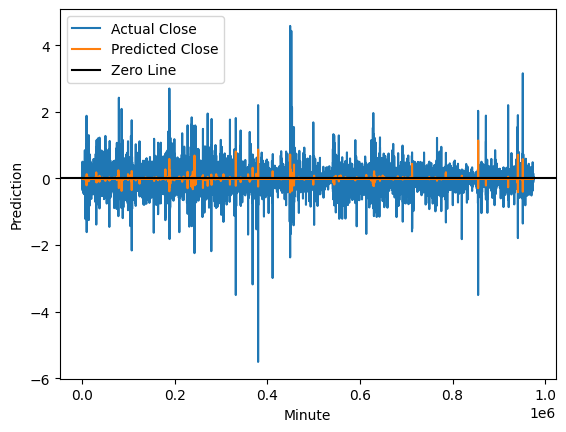

creating test graph


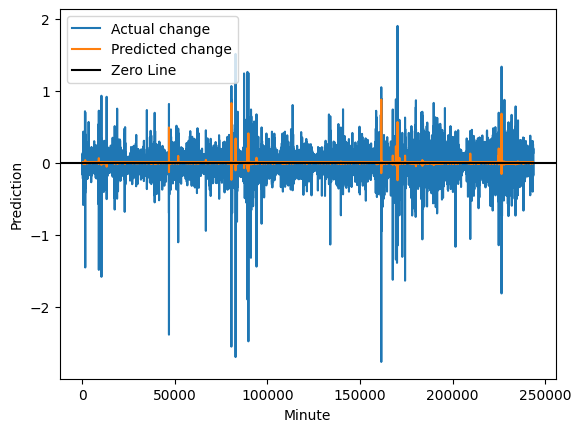

In [9]:
# Creates grpahs
bb.create_train_graph(X_train, y_train)
bb.create_test_graph(X_test, y_test)